In [20]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
def load_iterations(folder):
    files = sorted(
        [f for f in os.listdir(folder) if f.startswith("iter_")],
        key=lambda x: int(x.split("_")[1].split(".")[0])
    )

    iterations = []
    for f in files:
        with open(os.path.join(folder, f)) as file:
            iterations.append(json.load(file))

    return iterations

def plot_global_coverage_heatmap_side_by_side(problem_name, title1="Coverage 1", title2="Coverage 2"):
    iterations1 = load_iterations(f"./task4_results/quality_control/{problem_name}")
    iterations2 = load_iterations(f"./task4_results/quality_control_diversity/{problem_name}")
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

    counts_list = []
    for iterations in [iterations1, iterations2]:
        size = len(iterations[0]["grid"])
        counts = np.zeros((size, size), dtype=int)
        for it in iterations:
            grid = it["grid"]
            for i in range(size):
                for j in range(size):
                    if grid[i][j] is not None:
                        counts[i, j] += 1
        counts_list.append(counts)

    ims = []
    for ax, counts, title in zip(axes, counts_list, [title1, title2]):
        im = ax.imshow(counts, origin="lower", cmap="viridis")
        ims.append(im)
        ax.set_title(title)
        ax.set_xlabel("X behavior")

    axes[0].set_ylabel("Y behavior")

    fig.colorbar(ims[0], ax=axes.ravel().tolist(), label="Number of iterations occupied")

    plt.suptitle("Global Coverage Heatmap Comparison", fontsize=14)
    fig.text(
        0.5, 0.93,
        "How often bucket has been used in 100 iterations",
        ha="center",
        va="top",
        fontsize=10
    )
    plt.show()


def plot_fitness_heatmap_side_by_side(
    problem_name,
    fitness="quality",
    iteration_idx=-1,
    title1="Quality-Control", title2="Quality-Control-Diversity"
):
    it1 = load_iterations(f"./task4_results/quality_control/{problem_name}")[iteration_idx]
    it2 = load_iterations(f"./task4_results/quality_control_diversity/{problem_name}")[iteration_idx]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True, sharex=True)

    ims = []
    for ax, it, title in zip(axes, [it1, it2], [title1, title2]):
        size = int(np.sqrt(it["space_size"]))
        grid = it["grid"]
        data = np.full((size, size), np.nan)

        for i in range(size):
            for j in range(size):
                cell = grid[i][j]
                if cell is not None:
                    data[i, j] = cell[fitness]

        im = ax.imshow(data, cmap="viridis", origin="lower")
        ims.append(im)
        ax.set_title(title)
        ax.set_xlabel("X behavior")

    axes[0].set_ylabel("Y behavior")
    fig.colorbar(ims[0], ax=axes.ravel().tolist(), label=fitness)

    fig.suptitle(f"{fitness.capitalize()} heatmap (iteration {it1['iter']})", fontsize=14)
    fig.text(
        0.5, 0.93,
        f"How good (in terms of {fitness}) was result in the bucket after last iteration",
        ha="center",
        va="top",
        fontsize=10
    )
    plt.show()


def plot_info_progress_side_by_side(
    problem_name,
    info_key,
    title1="Quality-Control", title2="Quality-Control-Diversity"
):
    it1 = load_iterations(f"./task4_results/quality_control/{problem_name}")
    it2 = load_iterations(f"./task4_results/quality_control_diversity/{problem_name}")

    fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

    for ax, iterations, title in zip(
        axes,
        [it1, it2],
        [title1, title2]
    ):
        iters, mins, avgs, maxs = [], [], [], []

        for it in iterations:
            vals = []
            for row in it["grid"]:
                for cell in row:
                    if cell is not None and info_key in cell["info"]:
                        vals.append(cell["info"][info_key])

            if not vals:
                continue

            vals = np.array(vals, dtype=float)
            iters.append(it["iter"])
            mins.append(vals.min())
            avgs.append(vals.mean())
            maxs.append(vals.max())

        ax.plot(iters, mins, label="Min")
        ax.plot(iters, avgs, label="Avg")
        ax.plot(iters, maxs, label="Max")
        ax.set_title(title)
        ax.set_xlabel("Iteration")
        ax.grid(alpha=0.3)

    axes[0].set_ylabel(info_key)
    axes[0].legend()
    plt.suptitle(f"{info_key} progression comparison")
    plt.tight_layout()
    plt.show()



def plot_global_progress_side_by_side(
        problem_name,
        key="quality",
        title1="Quality-Control", title2="Quality-Control-Diversity"
):
    iters_data1 = load_iterations(f"./task4_results/quality_control/{problem_name}")
    iters_data2 = load_iterations(f"./task4_results/quality_control_diversity/{problem_name}")

    fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

    for ax, iterations, title in zip(
        axes,
        [iters_data1, iters_data2],
        [title1, title2]
    ):
        iters, mins, avgs, maxs = [], [], [], []

        for it in iterations:
            values = []
            for row in it["grid"]:
                for cell in row:
                    if cell is not None:
                        values.append(cell[key])

            if not values:
                continue

            values = np.array(values, dtype=float)
            iters.append(it["iter"])
            mins.append(values.min())
            avgs.append(values.mean())
            maxs.append(values.max())

        ax.plot(iters, mins, label="Min")
        ax.plot(iters, avgs, label="Avg")
        ax.plot(iters, maxs, label="Max")
        ax.set_title(title)
        ax.set_xlabel("Iteration")
        ax.grid(alpha=0.3)

    axes[0].set_ylabel(key)
    axes[0].legend()
    plt.suptitle(f"{key.capitalize()} progression comparison")
    plt.tight_layout()
    plt.show()


def plot_coverage_progress_side_by_side(problem_name, title1="Quality Control", title2="Quality Control Diversity"):
    iters1 = load_iterations(f"./task4_results/quality_control/{problem_name}")
    iters2 = load_iterations(f"./task4_results/quality_control_diversity/{problem_name}")

    fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

    for ax, iterations, title in zip(
        axes,
        [iters1, iters2],
        [title1, title2]
    ):
        iters = [it["iter"] for it in iterations]
        coverage = [it["coverage"] * 100 for it in iterations]

        ax.plot(iters, coverage, marker="o")
        ax.set_title(title)
        ax.set_xlabel("Iteration")
        ax.grid(alpha=0.3)

    axes[0].set_ylabel("Coverage [%]")
    plt.suptitle("Coverage progression comparison")
    fig.text(
        0.5, 0.93,
        "How many buckets were used in every iteration",
        ha="center",
        va="top",
        fontsize=10
    )
    plt.tight_layout()
    plt.show()



# Building problem
- X behavior - number of small blocks (1x1)
- Y behavior - number of big blocks (3x3)

My intuition: the best build with preference for small blocks vs. for the big ones.

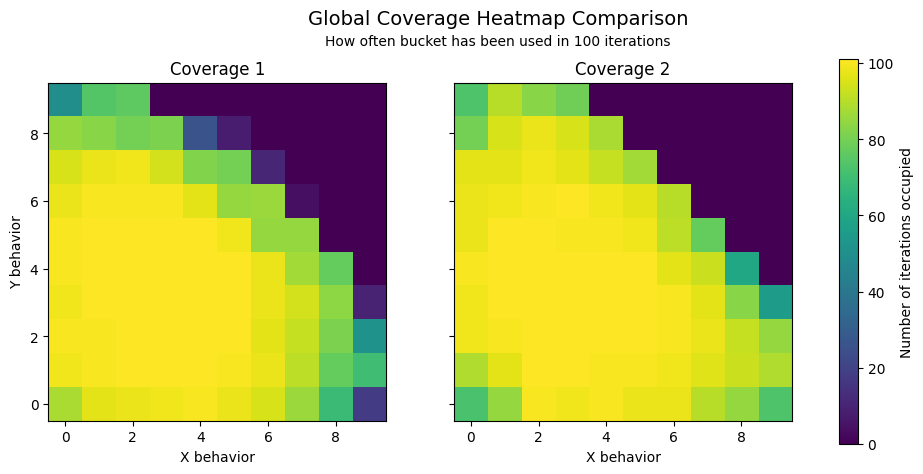

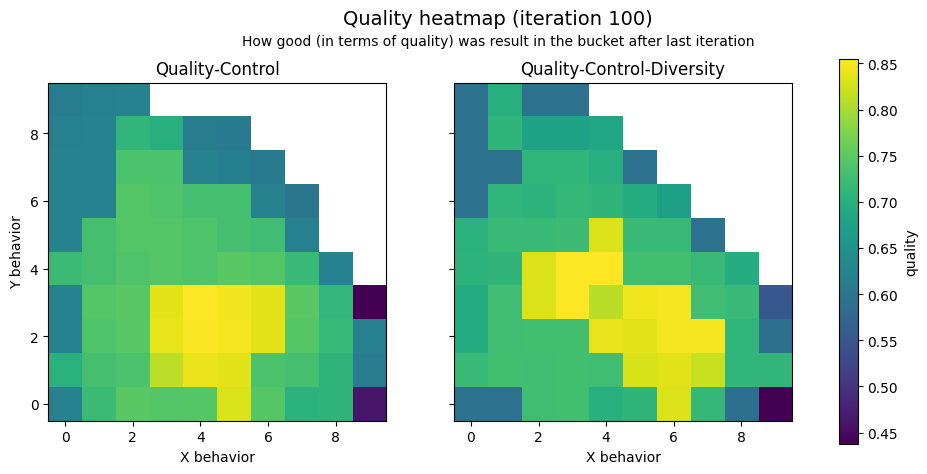

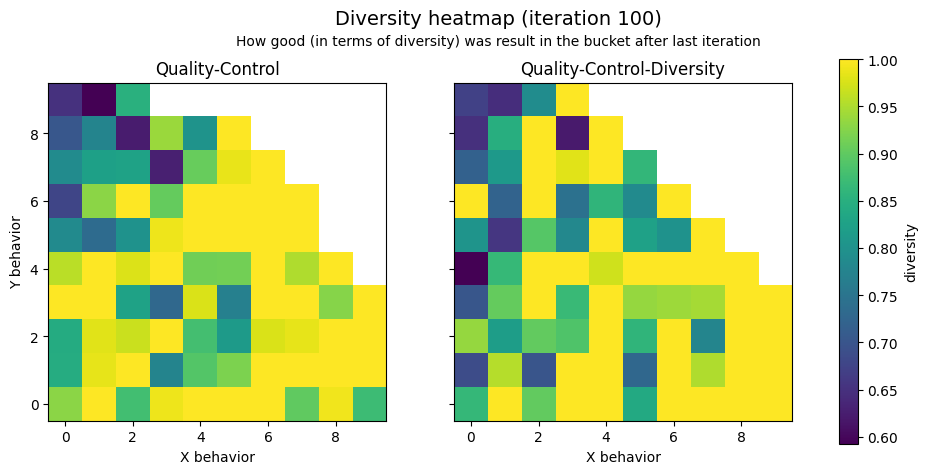

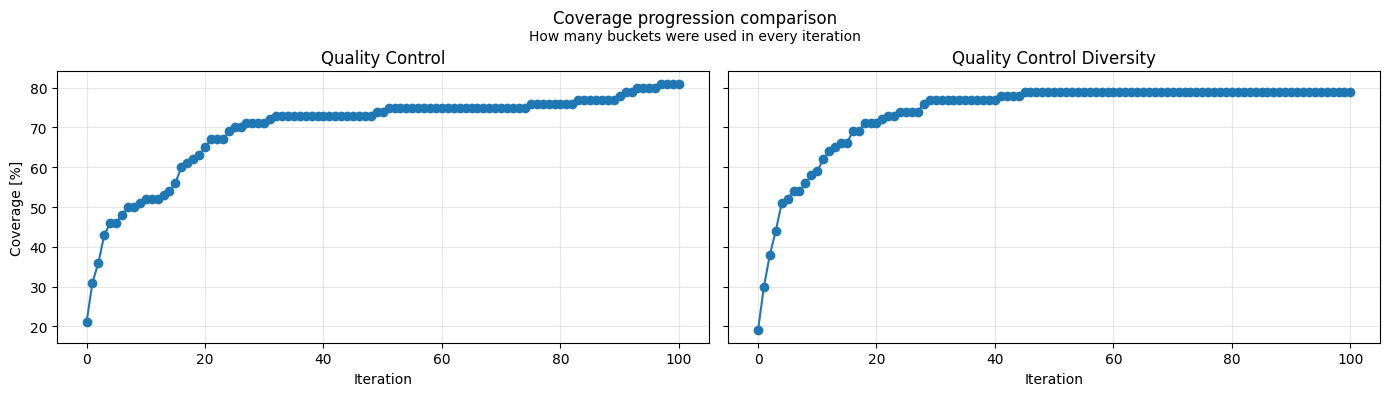

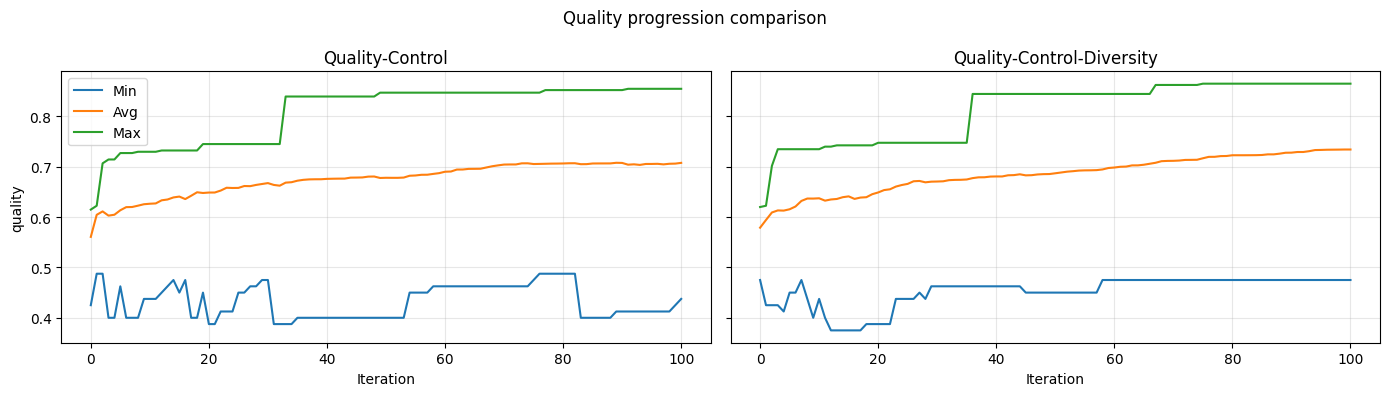

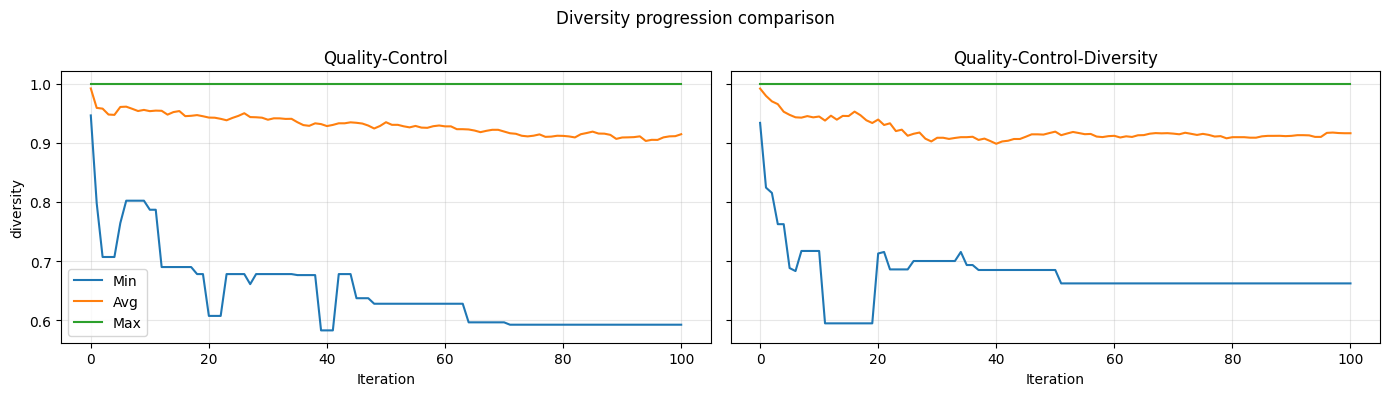

In [21]:
task_name = "building"

# heatmaps
plot_global_coverage_heatmap_side_by_side(task_name)
plot_fitness_heatmap_side_by_side(task_name)
plot_fitness_heatmap_side_by_side(task_name, "diversity")

# progression plots
plot_coverage_progress_side_by_side(task_name)
plot_global_progress_side_by_side(task_name, "quality")
plot_global_progress_side_by_side(task_name, "diversity")

# plot_info_progress_side_by_side(task_name, "1x1")
# plot_info_progress_side_by_side(task_name, "1x3")
# plot_info_progress_side_by_side(task_name, "3x1")
# plot_info_progress_side_by_side(task_name, "3x3")


# Elimination problem
- X behavior - number of short words (3 or 4 letters)
- Y behavior - number of long words (5 or 6 letters)

My intuition: the best solution with preference for short words vs. for the long ones.

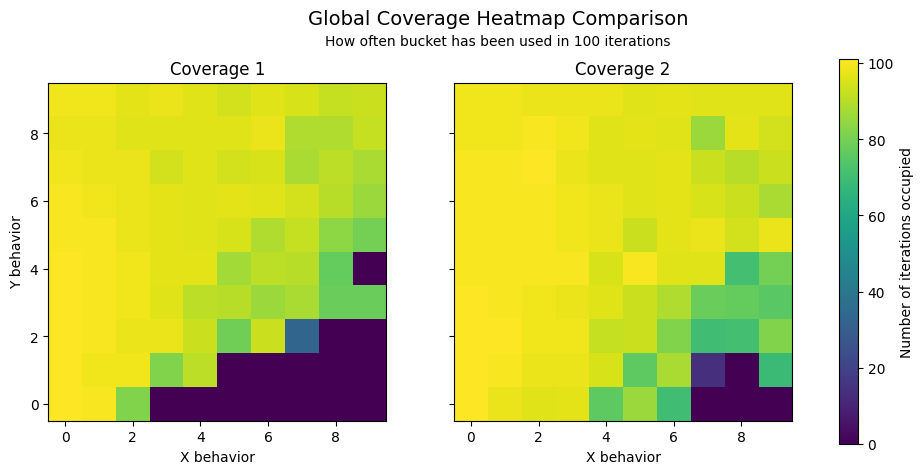

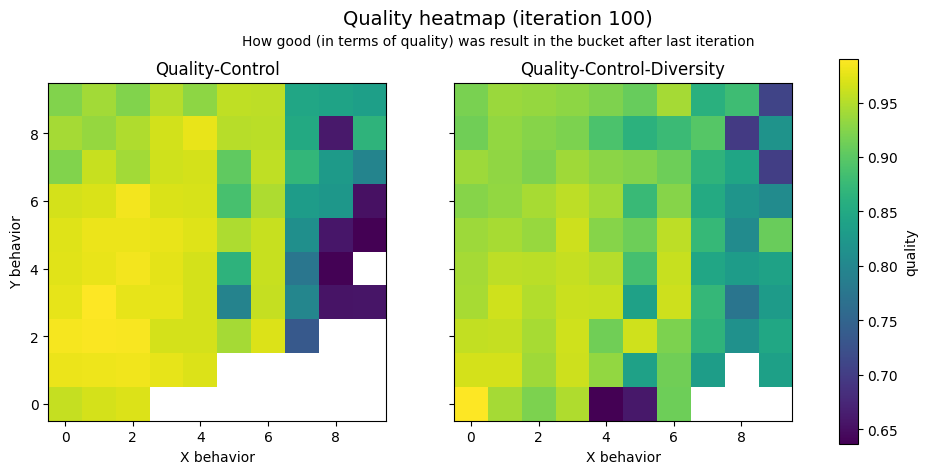

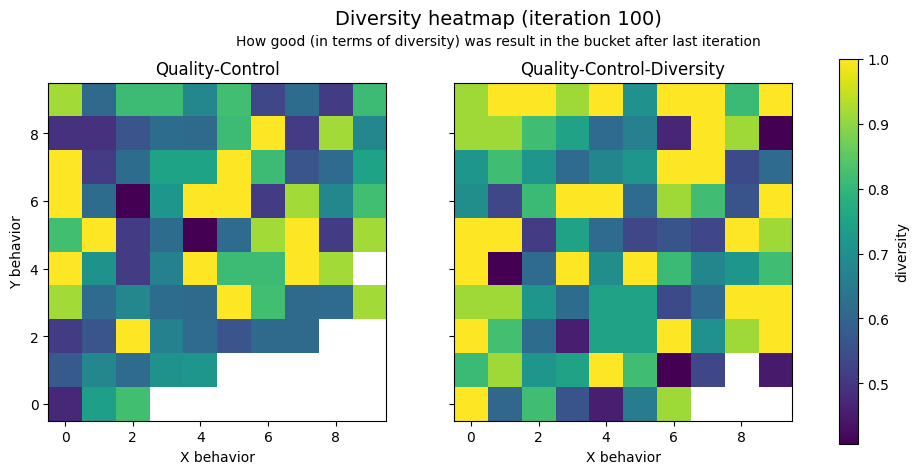

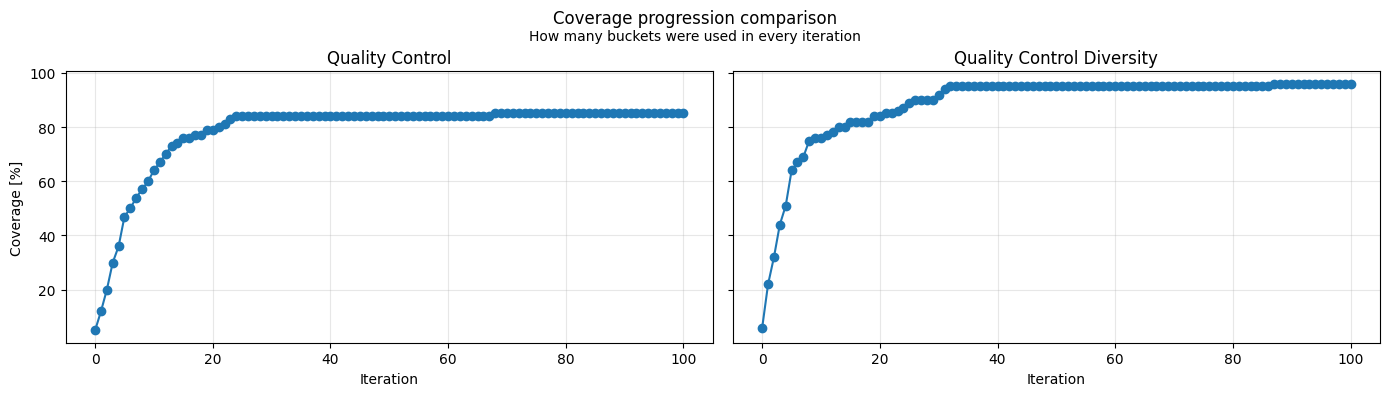

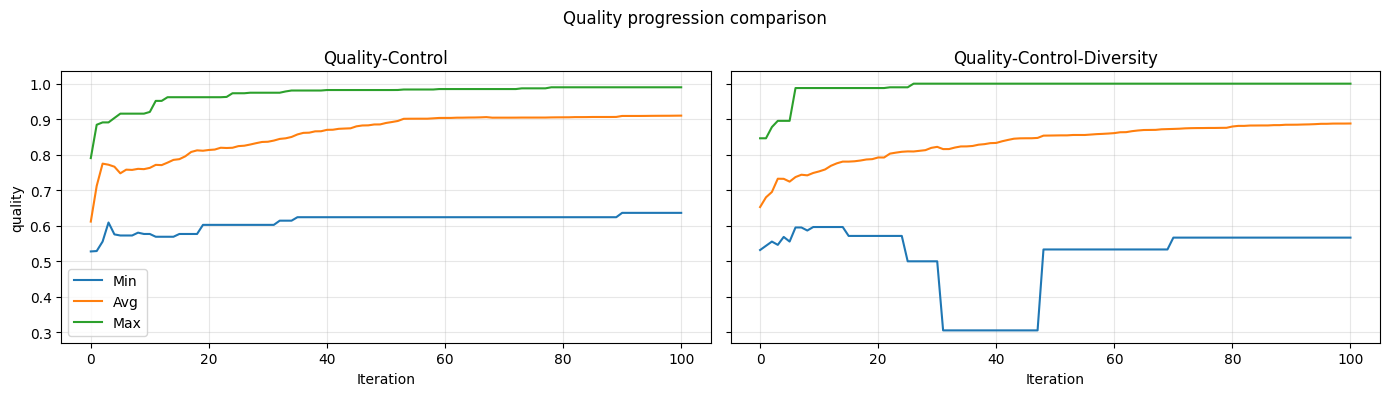

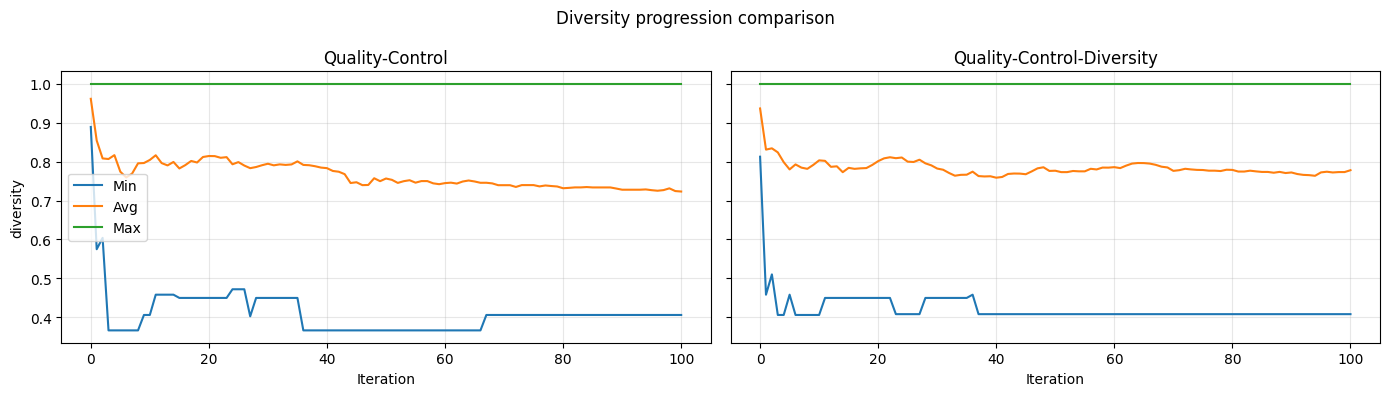

In [22]:
task_name = "elimination"

# heatmaps
plot_global_coverage_heatmap_side_by_side(task_name)
plot_fitness_heatmap_side_by_side(task_name)
plot_fitness_heatmap_side_by_side(task_name, "diversity")

# progression plots
plot_coverage_progress_side_by_side(task_name)
plot_global_progress_side_by_side(task_name, "quality")
plot_global_progress_side_by_side(task_name, "diversity")

# plot_info_progress_side_by_side(task_name, "short_words_len")
# plot_info_progress_side_by_side(task_name, "long_words_len")

# Zelda problem
- X behavior - number of enemies
- Y behavior - number of walls

My intuition: the best dangerous level (many enemies) vs. the best labyrinth-like level (many walls).

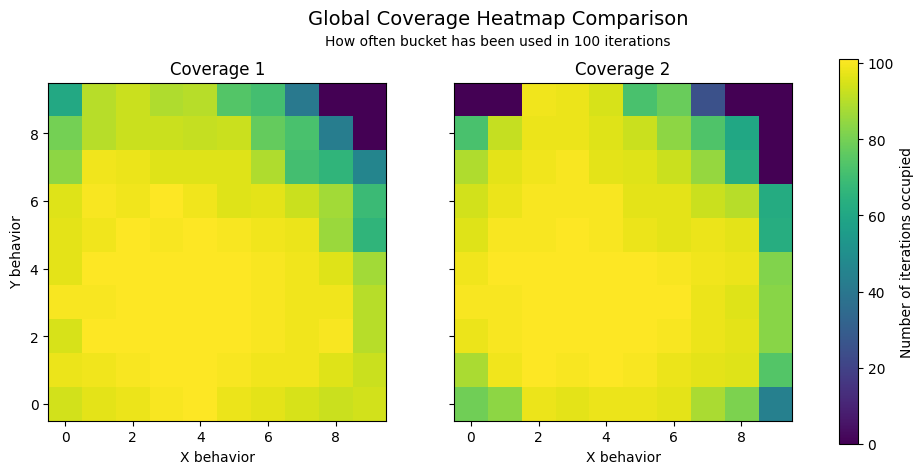

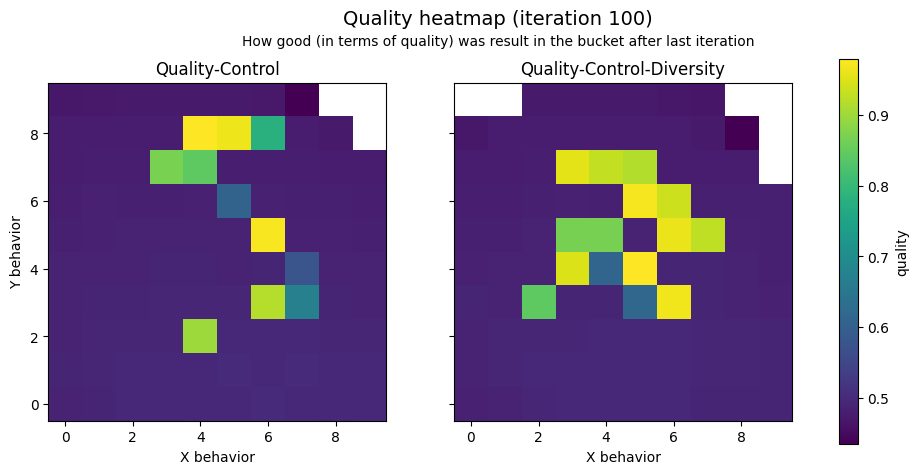

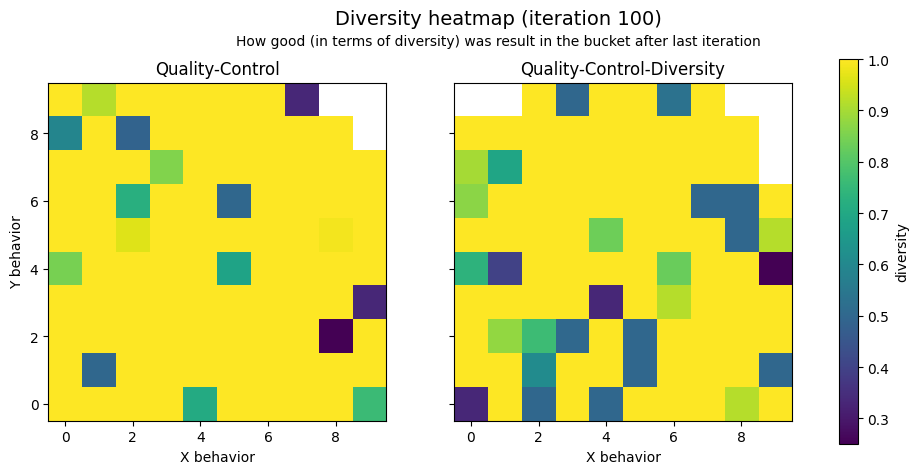

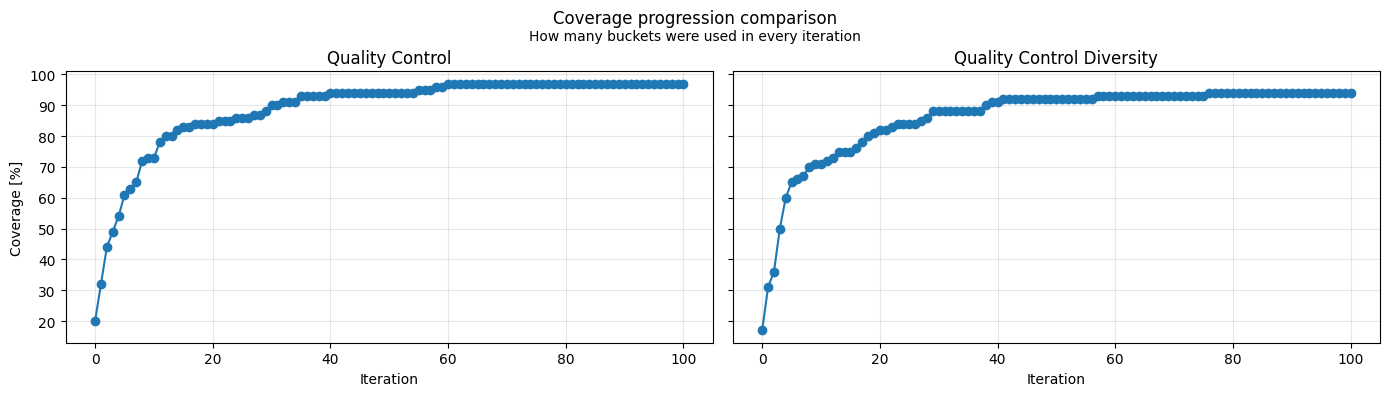

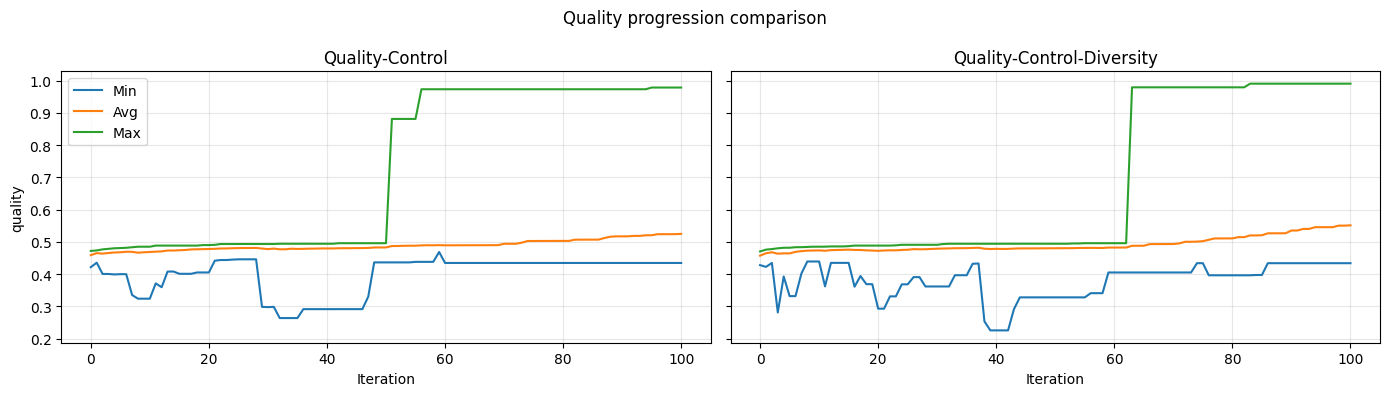

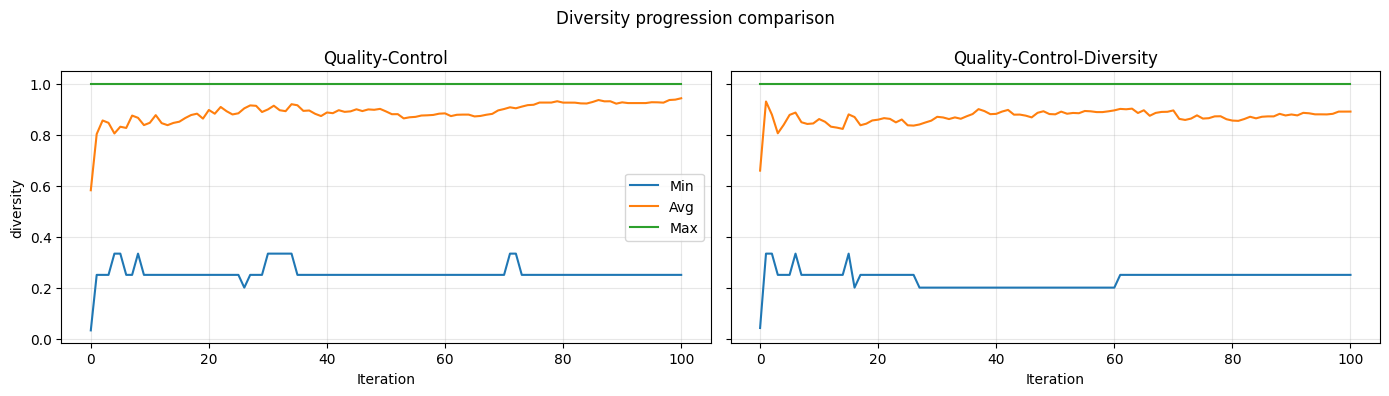

In [23]:
task_name = "zelda"

# heatmaps
plot_global_coverage_heatmap_side_by_side(task_name)
plot_fitness_heatmap_side_by_side(task_name)
plot_fitness_heatmap_side_by_side(task_name, "diversity")

# progression plots
plot_coverage_progress_side_by_side(task_name)
plot_global_progress_side_by_side(task_name, "quality")
plot_global_progress_side_by_side(task_name, "diversity")

# plot_info_progress_side_by_side(task_name, "enemies")
# plot_info_progress_side_by_side(task_name, "walls")